In [34]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings('ignore')

import string
alphabet=list(string.ascii_lowercase)

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.

In [2]:
cases={}
cases['ctrl']={}
cases['tunOnly']={}
cases['hpOnly']={}
cases['tun_hp']={}

for i in cases:
    cases[i]['machine_target']='gfdl.ncrc4-intel19-prod'
    if i == 'ctrl':
        cases[i]['path_root']='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'
    else:
        cases[i]['path_root']='/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2'
            
cases['ctrl']['name']='OM4p5_CORE2_IAF_gzCOBALT-013022_cy5'
cases['tunOnly']['name']='OM4p5_CORE2_IAF_gzCOBALT-tun_cy5'
cases['hpOnly']['name']='OM4p5_CORE2_IAF_gzCOBALT-hp_cy5'
cases['tun_hp']['name']='OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5'

print(cases)

{'ctrl': {'machine_target': 'gfdl.ncrc4-intel19-prod', 'path_root': '/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT', 'name': 'OM4p5_CORE2_IAF_gzCOBALT-013022_cy5'}, 'tunOnly': {'machine_target': 'gfdl.ncrc4-intel19-prod', 'path_root': '/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2', 'name': 'OM4p5_CORE2_IAF_gzCOBALT-tun_cy5'}, 'hpOnly': {'machine_target': 'gfdl.ncrc4-intel19-prod', 'path_root': '/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2', 'name': 'OM4p5_CORE2_IAF_gzCOBALT-hp_cy5'}, 'tun_hp': {'machine_target': 'gfdl.ncrc4-intel19-prod', 'path_root': '/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2', 'name': 'OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5'}}


In [3]:
grid_file=os.path.join(cases['ctrl']['path_root'], cases['ctrl']['name'], cases['ctrl']['machine_target'], 'pp')+'/ocean_annual/ocean_annual.static.nc'
#grid=xr.open_dataset(grid_file)
grid = xr.open_dataset('/work/jyl/tmp/ocean_static.nc')

In [4]:
import pandas as pd
pd.DataFrame.from_dict(cases).T

machine_target  \
ctrl     gfdl.ncrc4-intel19-prod   
tunOnly  gfdl.ncrc4-intel19-prod   
hpOnly   gfdl.ncrc4-intel19-prod   
tun_hp   gfdl.ncrc4-intel19-prod   

                                                 path_root  \
ctrl         /archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT   
tunOnly  /archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2   
hpOnly   /archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2   
tun_hp   /archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2   

                                        name  
ctrl     OM4p5_CORE2_IAF_gzCOBALT-013022_cy5  
tunOnly     OM4p5_CORE2_IAF_gzCOBALT-tun_cy5  
hpOnly       OM4p5_CORE2_IAF_gzCOBALT-hp_cy5  
tun_hp   OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5

# Read in Files
Use epc100 from ocean_cobalt_omip_2d

Use expc from ocean_cobalt_omip_rates_year_z, and select for z_l=1000. not exactly the flux at 1000 m but we don't have anything else

Then use fndet_fast_btm and fndet_btm from ocean_cobalt_btm (note it is in N units)

In [5]:
diagTypes_mon = ['ocean_cobalt_btm','ocean_cobalt_omip_2d'] 
diagTypes_ann = 'ocean_cobalt_omip_rates_year_z'
pp_dates='1988-2007'

just read everything in because python doesn't store it in memory until you actually need to use it

In [6]:
case='ctrl'

files_mon=[glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes_mon]
files_mon=sorted([f for fi in files_mon for f in fi]) # nested list comprehension

files_ann = glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ diagTypes_ann + '.' + pp_dates + '*.nc')

dc_mon = xr.open_mfdataset(files_mon, combine='by_coords')
dc_ann = xr.open_mfdataset(files_ann, combine='by_coords')

In [7]:
case='tunOnly'

files_mon=[glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes_mon]
files_mon=sorted([f for fi in files_mon for f in fi]) # nested list comprehension

files_ann = glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ diagTypes_ann + '.' + pp_dates + '*.nc')

d1_mon = xr.open_mfdataset(files_mon, combine='by_coords')
d1_ann = xr.open_mfdataset(files_ann, combine='by_coords')

In [8]:
case='hpOnly'

files_mon=[glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes_mon]
files_mon=sorted([f for fi in files_mon for f in fi]) # nested list comprehension

files_ann = glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ diagTypes_ann + '.' + pp_dates + '*.nc')

d2_mon = xr.open_mfdataset(files_mon, combine='by_coords')
d2_ann = xr.open_mfdataset(files_ann, combine='by_coords')

In [9]:
case='tun_hp'

files_mon=[glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes_mon]
files_mon=sorted([f for fi in files_mon for f in fi]) # nested list comprehension

files_ann = glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ diagTypes_ann + '.' + pp_dates + '*.nc')

d3_mon = xr.open_mfdataset(files_mon, combine='by_coords')
d3_ann = xr.open_mfdataset(files_ann, combine='by_coords')

In [10]:
days_in_month = xr.DataArray([31,28,31,30,31,30,31,31,30,31,30,31], coords={'time':dc_mon.time}, dims='time')

In [11]:
days_in_month_wgts=days_in_month / days_in_month.mean()
days_in_month_wgts

<xarray.DataArray (time: 12)>
array([1.01917808, 0.92054795, 1.01917808, 0.98630137, 1.01917808,
       0.98630137, 1.01917808, 1.01917808, 0.98630137, 1.01917808,
       0.98630137, 1.01917808])
Coordinates:
  * time     (time) object 1999-07-18 00:00:00 ... 2000-06-17 00:00:00

## Extract variables

#### Fluxes: convert all units from mol C m-2 s-1 to mg C m-2 d-1

In [12]:
dc_mon.epc100.attrs

{'long_name': 'Downward Flux of Particulate Organic Carbon',
 'units': 'mol m-2 s-1',
 'cell_measures': 'area: areacello',
 'standard_name': 'sinking_mole_flux_of_particulate_organic_matter_expressed_as_carbon_in_sea_water',
 'cell_methods': 'area:mean yh:mean xh:mean time: mean within months time: mean over years',
 'time_avg_info': 'average_T1,average_T2,average_DT'}

In [13]:
flux100_ctrl = (dc_mon.epc100 * days_in_month_wgts).mean(dim='time') * seconds_per_day * carbon_molar_mass * 1e3
flux100_tun = (d1_mon.epc100 * days_in_month_wgts).mean(dim='time') * seconds_per_day * carbon_molar_mass * 1e3
flux100_hp = (d2_mon.epc100 * days_in_month_wgts).mean(dim='time') * seconds_per_day * carbon_molar_mass * 1e3
flux100_tun_hp = (d3_mon.epc100 * days_in_month_wgts).mean(dim='time') * seconds_per_day * carbon_molar_mass * 1e3

In [14]:
dc_ann.expc.attrs

{'long_name': 'Sinking Particulate Organic Carbon Flux',
 'units': 'mol m-2 s-1',
 'cell_measures': 'volume: volcello area: areacello',
 'standard_name': 'sinking_mole_flux_of_particulate_organic_matter_expressed_as_carbon_in_sea_water',
 'cell_methods': 'area:mean z_l:mean yh:mean xh:mean time: mean',
 'time_avg_info': 'average_T1,average_T2,average_DT'}

In [15]:
flux1000_ctrl = dc_ann.expc.sel(z_l=1000.).isel(time=0) * seconds_per_day * carbon_molar_mass * 1e3
flux1000_tun = d1_ann.expc.sel(z_l=1000.).isel(time=0) * seconds_per_day * carbon_molar_mass * 1e3
flux1000_hp = d2_ann.expc.sel(z_l=1000.).isel(time=0) * seconds_per_day * carbon_molar_mass * 1e3
flux1000_tun_hp = d3_ann.expc.sel(z_l=1000.).isel(time=0) * seconds_per_day * carbon_molar_mass * 1e3

In [16]:
dc_mon.fndet_btm.attrs

{'long_name': 'ndet sinking flux to bottom',
 'units': 'mol m-2 s-1',
 'cell_measures': 'area: areacello',
 'cell_methods': 'area:mean yh:mean xh:mean time: mean within months time: mean over years',
 'time_avg_info': 'average_T1,average_T2,average_DT'}

In [17]:
fluxbtm_ctrl = (dc_mon.fndet_btm * days_in_month_wgts).mean(dim='time') * cobalt_n_2_c * seconds_per_day * carbon_molar_mass * 1e3
fluxbtm_tun = ((d1_mon.fndet_btm + d1_mon.fndet_fast_btm) * days_in_month_wgts).mean(dim='time') * cobalt_n_2_c * seconds_per_day * carbon_molar_mass * 1e3
fluxbtm_hp = ((d2_mon.fndet_btm + d2_mon.fndet_fast_btm) * days_in_month_wgts).mean(dim='time') * cobalt_n_2_c * seconds_per_day * carbon_molar_mass * 1e3
fluxbtm_tun_hp = ((d3_mon.fndet_btm + d3_mon.fndet_fast_btm) * days_in_month_wgts).mean(dim='time') * cobalt_n_2_c * seconds_per_day * carbon_molar_mass * 1e3

#### Compute Transfer Efficiencies

In [18]:
te1000_ctrl = flux1000_ctrl / flux100_ctrl
te1000_tun = flux1000_tun / flux100_tun
te1000_hp = flux1000_hp / flux100_hp
te1000_tun_hp = flux1000_tun_hp / flux100_tun_hp

In [19]:
tebtm_ctrl = fluxbtm_ctrl / flux100_ctrl
tebtm_tun = fluxbtm_tun / flux100_tun
tebtm_hp = fluxbtm_hp / flux100_hp
tebtm_tun_hp = fluxbtm_tun_hp / flux100_tun_hp

# Compute global values
Convert from mg C m-2 d-1 to g C y-1

In [35]:
val_f100_ctrl = (flux100_ctrl*grid.areacello).sum(dim=['xh','yh']).values * 1e-3 * 365
val_f100_tun = (flux100_tun*grid.areacello).sum(dim=['xh','yh']).values * 1e-3 * 365
val_f100_hp = (flux100_hp*grid.areacello).sum(dim=['xh','yh']).values * 1e-3 * 365
val_f100_tun_hp = (flux100_tun_hp*grid.areacello).sum(dim=['xh','yh']).values * 1e-3 * 365

In [36]:
print('Export flux past 100m')
print('Ctrl: '+ str(np.round(val_f100_ctrl/1e15,2)) + ' Pg C/yr')
print('Tun only: '+ str(np.round(val_f100_tun/1e15,2)) + ' Pg C/yr; % diff: ' + str(np.round((val_f100_tun - val_f100_ctrl)/val_f100_ctrl * 100,1)) + '%')
print('HP only: '+ str(np.round(val_f100_hp/1e15,2)) + ' Pg C/yr; % diff: ' + str(np.round((val_f100_hp - val_f100_ctrl)/val_f100_ctrl * 100,1)) + '%')
print('Tun & HP: '+ str(np.round(val_f100_tun_hp/1e15,2)) + ' Pg C/yr; % diff: ' + str(np.round((val_f100_tun_hp - val_f100_ctrl)/val_f100_ctrl * 100,1)) + '%')

Export flux past 100m
Ctrl: 6.17 Pg C/yr
Tun only: 5.82 Pg C/yr; % diff: -5.6%
HP only: 5.75 Pg C/yr; % diff: -6.9%
Tun & HP: 5.49 Pg C/yr; % diff: -11.0%


In [37]:
val_f1000_ctrl = (flux1000_ctrl*grid.areacello).sum(dim=['xh','yh']).values * 1e-3 * 365
val_f1000_tun = (flux1000_tun*grid.areacello).sum(dim=['xh','yh']).values * 1e-3 * 365
val_f1000_hp = (flux1000_hp*grid.areacello).sum(dim=['xh','yh']).values * 1e-3 * 365
val_f1000_tun_hp = (flux1000_tun_hp*grid.areacello).sum(dim=['xh','yh']).values * 1e-3 * 365

In [38]:
print('Sequestration Flux (past 1000m)')
print('Ctrl: '+ str(np.round(val_f1000_ctrl/1e15,2)) + ' Pg C/yr')
print('Tun only: '+ str(np.round(val_f1000_tun/1e15,2)) + ' Pg C/yr; % diff: ' + str(np.round((val_f1000_tun - val_f1000_ctrl)/val_f1000_ctrl * 100,1)) + '%')
print('HP only: '+ str(np.round(val_f1000_hp/1e15,2)) + ' Pg C/yr; % diff: ' + str(np.round((val_f1000_hp - val_f1000_ctrl)/val_f1000_ctrl * 100,1)) + '%')
print('Tun & HP: '+ str(np.round(val_f1000_tun_hp/1e15,2)) + ' Pg C/yr; % diff: ' + str(np.round((val_f1000_tun_hp - val_f1000_ctrl)/val_f1000_ctrl * 100,1)) + '%')

Sequestration Flux (past 1000m)
Ctrl: 0.84 Pg C/yr
Tun only: 1.01 Pg C/yr; % diff: 19.3%
HP only: 1.02 Pg C/yr; % diff: 21.3%
Tun & HP: 1.15 Pg C/yr; % diff: 36.9%


In [39]:
val_fbtm_ctrl = (fluxbtm_ctrl*grid.areacello).sum(dim=['xh','yh']).values * 1e-3 * 365
val_fbtm_tun = (fluxbtm_tun*grid.areacello).sum(dim=['xh','yh']).values * 1e-3 * 365
val_fbtm_hp = (fluxbtm_hp*grid.areacello).sum(dim=['xh','yh']).values * 1e-3 * 365
val_fbtm_tun_hp = (fluxbtm_tun_hp*grid.areacello).sum(dim=['xh','yh']).values * 1e-3 * 365

In [40]:
print('Bottom Flux')
print('Ctrl: '+ str(np.round(val_fbtm_ctrl/1e15,2)) + ' Pg C/yr')
print('Tun only: '+ str(np.round(val_fbtm_tun/1e15,2)) + ' Pg C/yr; % diff: ' + str(np.round((val_fbtm_tun - val_fbtm_ctrl)/val_fbtm_ctrl * 100,1)) + '%')
print('HP only: '+ str(np.round(val_fbtm_hp/1e15,2)) + ' Pg C/yr; % diff: ' + str(np.round((val_fbtm_hp - val_fbtm_ctrl)/val_fbtm_ctrl * 100,1)) + '%')
print('Tun & HP: '+ str(np.round(val_fbtm_tun_hp/1e15,2)) + ' Pg C/yr; % diff: ' + str(np.round((val_fbtm_tun_hp - val_fbtm_ctrl)/val_fbtm_ctrl * 100,1)) + '%')

Bottom Flux
Ctrl: 1.26 Pg C/yr
Tun only: 1.33 Pg C/yr; % diff: 5.6%
HP only: 1.34 Pg C/yr; % diff: 6.3%
Tun & HP: 1.4 Pg C/yr; % diff: 11.1%


In [41]:
val_fbtm_deep_ctrl = (fluxbtm_ctrl*grid.areacello).where(grid.deptho.values >= 2000).sum(dim=['xh','yh']).values * 1e-3 * 365
val_fbtm_deep_tun = (fluxbtm_tun*grid.areacello).where(grid.deptho.values >= 2000).sum(dim=['xh','yh']).values * 1e-3 * 365
val_fbtm_deep_hp = (fluxbtm_hp*grid.areacello).where(grid.deptho.values >= 2000).sum(dim=['xh','yh']).values * 1e-3 * 365
val_fbtm_deep_tun_hp = (fluxbtm_tun_hp*grid.areacello).where(grid.deptho.values >= 2000).sum(dim=['xh','yh']).values * 1e-3 * 365

In [45]:
print('Bottom Flux at Depths below 2000 m')
print('Ctrl: '+ str(np.round(val_fbtm_deep_ctrl/1e15,2)) + ' Pg C/yr')
print('Tun only: '+ str(np.round(val_fbtm_deep_tun/1e15,2)) + ' Pg C/yr; % diff: ' + str(np.round((val_fbtm_deep_tun - val_fbtm_deep_ctrl)/val_fbtm_deep_ctrl * 100,1)) + '%')
print('HP only: '+ str(np.round(val_fbtm_deep_hp/1e15,2)) + ' Pg C/yr; % diff: ' + str(np.round((val_fbtm_deep_hp - val_fbtm_deep_ctrl)/val_fbtm_deep_ctrl * 100,1)) + '%')
print('Tun & HP: '+ str(np.round(val_fbtm_deep_tun_hp/1e15,2)) + ' Pg C/yr; % diff: ' + str(np.round((val_fbtm_deep_tun_hp - val_fbtm_deep_ctrl)/val_fbtm_deep_ctrl * 100,1)) + '%')

Bottom Flux at Depths below 2000 m
Ctrl: 0.28 Pg C/yr
Tun only: 0.39 Pg C/yr; % diff: 36.7%
HP only: 0.4 Pg C/yr; % diff: 39.9%
Tun & HP: 0.47 Pg C/yr; % diff: 67.2%


In [43]:
val_fbtm_coastal_ctrl = (fluxbtm_ctrl*grid.areacello).where(grid.deptho.values <= 200).sum(dim=['xh','yh']).values * 1e-3 * 365
val_fbtm_coastal_tun = (fluxbtm_tun*grid.areacello).where(grid.deptho.values <= 200).sum(dim=['xh','yh']).values * 1e-3 * 365
val_fbtm_coastal_hp = (fluxbtm_hp*grid.areacello).where(grid.deptho.values <= 200).sum(dim=['xh','yh']).values * 1e-3 * 365
val_fbtm_coastal_tun_hp = (fluxbtm_tun_hp*grid.areacello).where(grid.deptho.values <= 200).sum(dim=['xh','yh']).values * 1e-3 * 365

In [44]:
print('Bottom Flux - Coastal')
print('Ctrl: '+ str(np.round(val_fbtm_coastal_ctrl/1e15,2)) + ' Pg C/yr; % of total: ' + str(np.round(val_fbtm_coastal_ctrl/val_fbtm_ctrl * 100,1)) + '%')
print('Tun only: '+ str(np.round(val_fbtm_coastal_tun/1e15,2)) + ' Pg C/yr; % of total: ' + str(np.round(val_fbtm_coastal_tun/val_fbtm_tun * 100,1)) + '%')
print('HP only: '+ str(np.round(val_fbtm_coastal_hp/1e15,2)) + ' Pg C/yr; % of total: ' + str(np.round(val_fbtm_coastal_hp/val_fbtm_hp * 100,1)) + '%')
print('Tun & HP: '+ str(np.round(val_fbtm_coastal_tun_hp/1e15,2)) + ' Pg C/yr; % of total: ' + str(np.round(val_fbtm_coastal_tun_hp/val_fbtm_tun_hp * 100,1)) + '%')

Bottom Flux - Coastal
Ctrl: 0.74 Pg C/yr; % of total: 58.6%
Tun only: 0.7 Pg C/yr; % of total: 52.4%
HP only: 0.69 Pg C/yr; % of total: 51.5%
Tun & HP: 0.67 Pg C/yr; % of total: 47.4%


# Plot

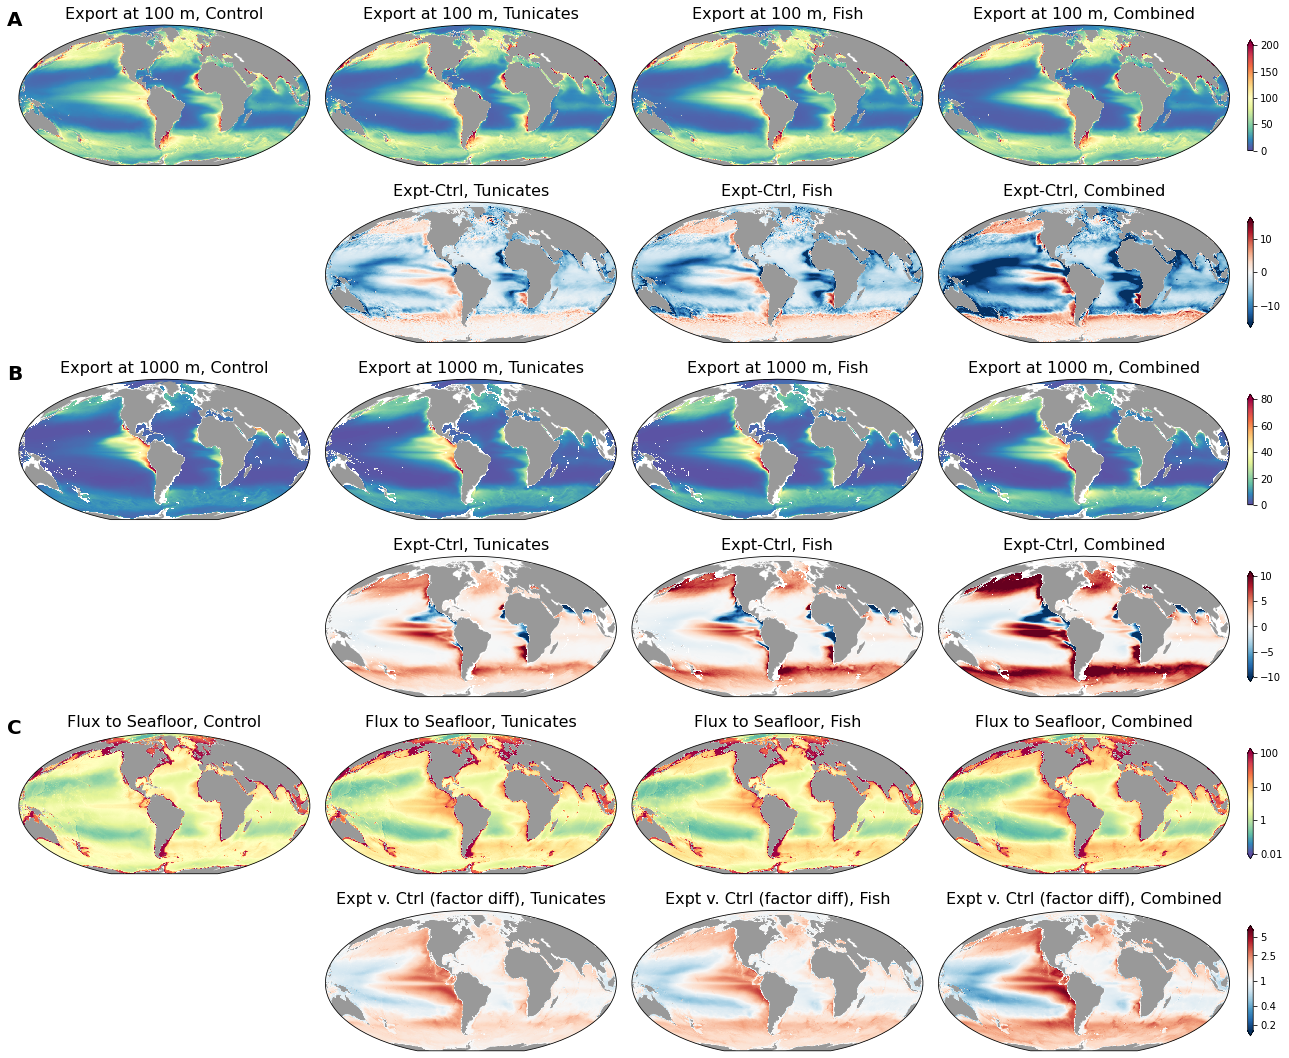

In [29]:
fig=plt.figure(figsize=(23,19))
gs=gridspec.GridSpec(6,4, wspace=0.05, width_ratios=[1,1,1,1.25])

ax={};cs={}

## Export depth ##
vmin=0; vmax=200
dmin=-15; dmax=-dmin

i=0
field=flux100_ctrl
ax[i]=plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('Export at 100 m, Control', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')
ax[i].text(-0.04, 1.1, 'A', transform=ax[i].transAxes, fontsize=20, fontweight='bold', va='top')

i=1
field=flux100_tun
ax[i]=plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Export at 100 m, Tunicates', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=2
field=flux100_hp
ax[i]=plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Export at 100 m, Fish', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=3
field=flux100_tun_hp
ax[i]=plt.subplot(gs[0,3],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Export at 100 m, Combined', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='max')

# diffs
i=4
field=flux100_tun-flux100_ctrl
ax[i] = plt.subplot(gs[1,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Tunicates', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=5
field=flux100_hp-flux100_ctrl
ax[i] = plt.subplot(gs[1,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Fish', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=6
field=flux100_tun_hp-flux100_ctrl
ax[i] = plt.subplot(gs[1,3],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Combined', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')



## Sequestration depth ##
vmin=0; vmax=80
dmin=-10; dmax=-dmin

i=7
field=flux1000_ctrl
ax[i]=plt.subplot(gs[2,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('Export at 1000 m, Control', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')
ax[i].text(-0.04, 1.1, 'B', transform=ax[i].transAxes, fontsize=20, fontweight='bold', va='top')

i=8
field=flux1000_tun
ax[i]=plt.subplot(gs[2,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Export at 1000 m, Tunicates', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=9
field=flux1000_hp
ax[i]=plt.subplot(gs[2,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Export at 1000 m, Fish', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=10
field=flux1000_tun_hp
ax[i]=plt.subplot(gs[2,3],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Export at 1000 m, Combined', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='max')

# diffs
i=11
field=flux1000_tun-flux1000_ctrl
ax[i] = plt.subplot(gs[3,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Tunicates', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=12
field=flux1000_hp-flux1000_ctrl
ax[i] = plt.subplot(gs[3,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Fish', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=13
field=flux1000_tun_hp-flux1000_ctrl
ax[i] = plt.subplot(gs[3,3],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Combined', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')



## Seafloor ##
vmin=-1; vmax=2
ticks=[-1, 0, 1, 2]
labels=[0.01, 1, 10, 100]

dmin=-10; dmax=-dmin

i=14
field=np.log10(fluxbtm_ctrl)
ax[i]=plt.subplot(gs[4,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('Flux to Seafloor, Control', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')
ax[i].text(-0.04, 1.1, 'C', transform=ax[i].transAxes, fontsize=20, fontweight='bold', va='top')

i=15
field=np.log10(fluxbtm_tun)
ax[i]=plt.subplot(gs[4,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Flux to Seafloor, Tunicates', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=16
field=np.log10(fluxbtm_hp)
ax[i]=plt.subplot(gs[4,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Flux to Seafloor, Fish', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=17
field=np.log10(fluxbtm_tun_hp)
ax[i]=plt.subplot(gs[4,3],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Flux to Seafloor, Combined', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

cbar=plt.colorbar(cs[i], shrink=0.75, ticks=ticks, extend='both')
cbar.ax.set_yticklabels(labels)

# diffs

dmin=-0.8; dmax=0.8
ticks=[-0.7, -0.4, 0, 0.4, 0.7]
labels=[0.2, 0.4, 1, 2.5, 5]

i=18
field=np.log10(fluxbtm_tun)-np.log10(fluxbtm_ctrl)
ax[i] = plt.subplot(gs[5,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt v. Ctrl (factor diff), Tunicates', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=19
field=np.log10(fluxbtm_hp)-np.log10(fluxbtm_ctrl)
ax[i] = plt.subplot(gs[5,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt v. Ctrl (factor diff), Fish', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=20
field=np.log10(fluxbtm_tun_hp)-np.log10(fluxbtm_ctrl)
ax[i] = plt.subplot(gs[5,3],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt v. Ctrl (factor diff), Combined', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

cbar=plt.colorbar(cs[i], shrink=0.75, ticks=ticks, extend='both')
cbar.ax.set_yticklabels(labels)

plt.tight_layout()
plt.savefig('plots/Combined_Flux_Comparison.png', dpi=300, bbox_inches='tight')
#plt.savefig('plots/Combined_Flux_Comparison_hires.png', dpi=600, bbox_inches='tight')


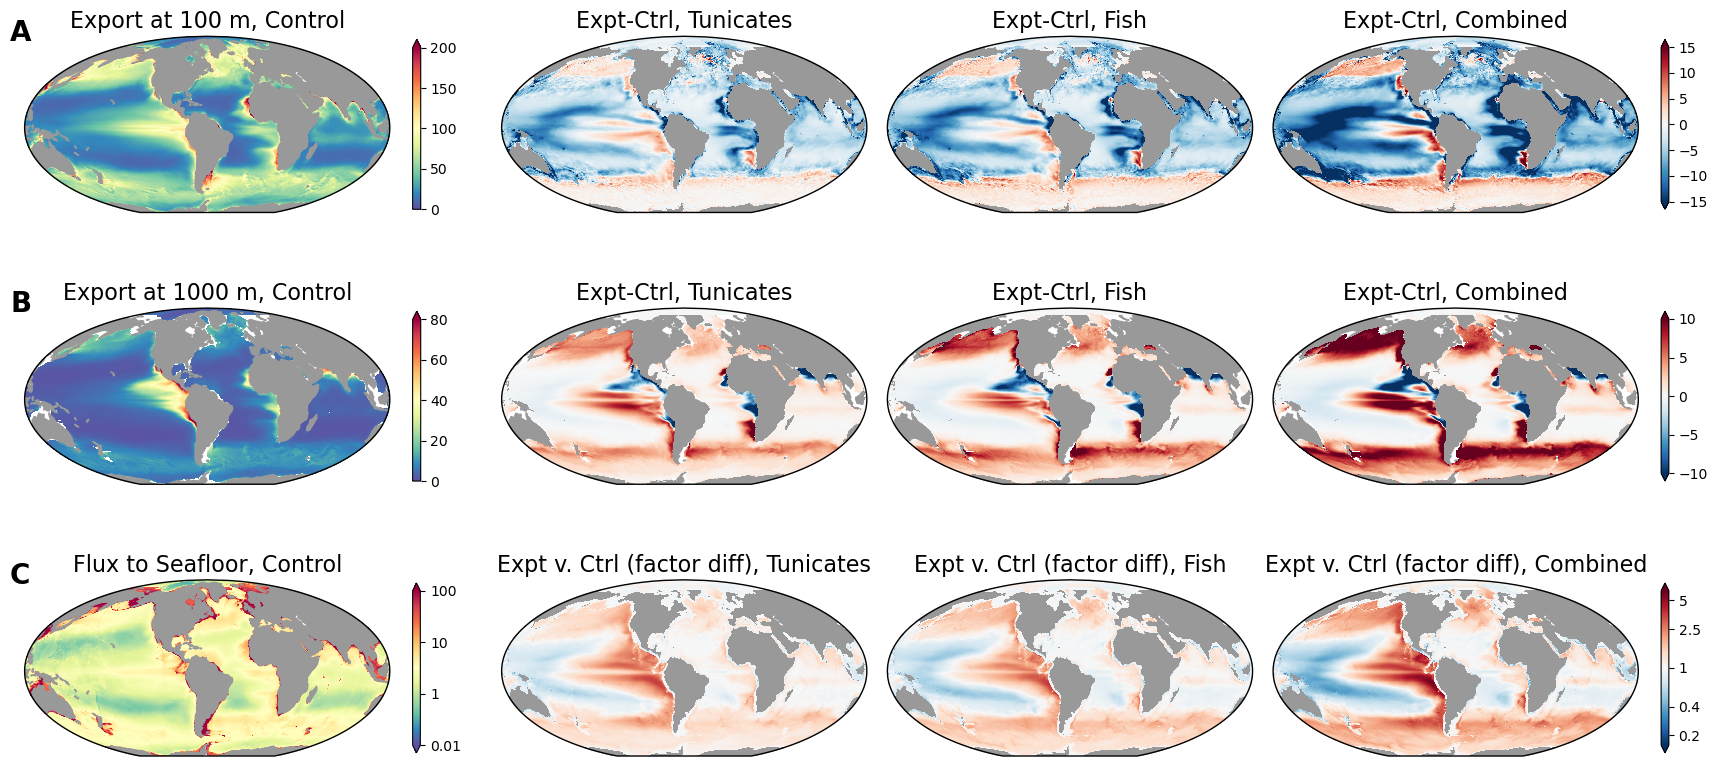

In [31]:
fig=plt.figure(figsize=(22,10))
gs=gridspec.GridSpec(3,4, wspace=0.05, width_ratios=[1.25,1,1,1.25])

ax={};cs={}

## Export depth ##
vmin=0; vmax=200
dmin=-15; dmax=-dmin

i=0
field=flux100_ctrl
ax[i]=plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('Export at 100 m, Control', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')
ax[i].text(-0.04, 1.1, 'A', transform=ax[i].transAxes, fontsize=20, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='max')

# diffs
i=1
field=flux100_tun-flux100_ctrl
ax[i] = plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Tunicates', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=2
field=flux100_hp-flux100_ctrl
ax[i] = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Fish', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=3
field=flux100_tun_hp-flux100_ctrl
ax[i] = plt.subplot(gs[0,3],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Combined', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')



## Sequestration depth ##
vmin=0; vmax=80
dmin=-10; dmax=-dmin

i=4
field=flux1000_ctrl
ax[i]=plt.subplot(gs[1,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('Export at 1000 m, Control', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')
ax[i].text(-0.04, 1.1, 'B', transform=ax[i].transAxes, fontsize=20, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='max')

# diffs
i=5
field=flux1000_tun-flux1000_ctrl
ax[i] = plt.subplot(gs[1,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Tunicates', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=6
field=flux1000_hp-flux1000_ctrl
ax[i] = plt.subplot(gs[1,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Fish', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=7
field=flux1000_tun_hp-flux1000_ctrl
ax[i] = plt.subplot(gs[1,3],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Combined', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')



## Seafloor ##
vmin=-1; vmax=2
ticks=[-1, 0, 1, 2]
labels=[0.01, 1, 10, 100]

dmin=-10; dmax=-dmin

i=8
field=np.log10(fluxbtm_ctrl)
ax[i]=plt.subplot(gs[2,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('Flux to Seafloor, Control', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')
ax[i].text(-0.04, 1.1, 'C', transform=ax[i].transAxes, fontsize=20, fontweight='bold', va='top')

cbar=plt.colorbar(cs[i], shrink=0.75, ticks=ticks, extend='both')
cbar.ax.set_yticklabels(labels)

# diffs

dmin=-0.8; dmax=0.8
ticks=[-0.7, -0.4, 0, 0.4, 0.7]
labels=[0.2, 0.4, 1, 2.5, 5]

i=9
field=np.log10(fluxbtm_tun)-np.log10(fluxbtm_ctrl)
ax[i] = plt.subplot(gs[2,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt v. Ctrl (factor diff), Tunicates', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=10
field=np.log10(fluxbtm_hp)-np.log10(fluxbtm_ctrl)
ax[i] = plt.subplot(gs[2,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt v. Ctrl (factor diff), Fish', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=11
field=np.log10(fluxbtm_tun_hp)-np.log10(fluxbtm_ctrl)
ax[i] = plt.subplot(gs[2,3],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt v. Ctrl (factor diff), Combined', fontsize=16)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

cbar=plt.colorbar(cs[i], shrink=0.75, ticks=ticks, extend='both')
cbar.ax.set_yticklabels(labels)

plt.tight_layout()
plt.savefig('plots/Combined_Flux_Comparison_reduced.png', dpi=300, bbox_inches='tight')

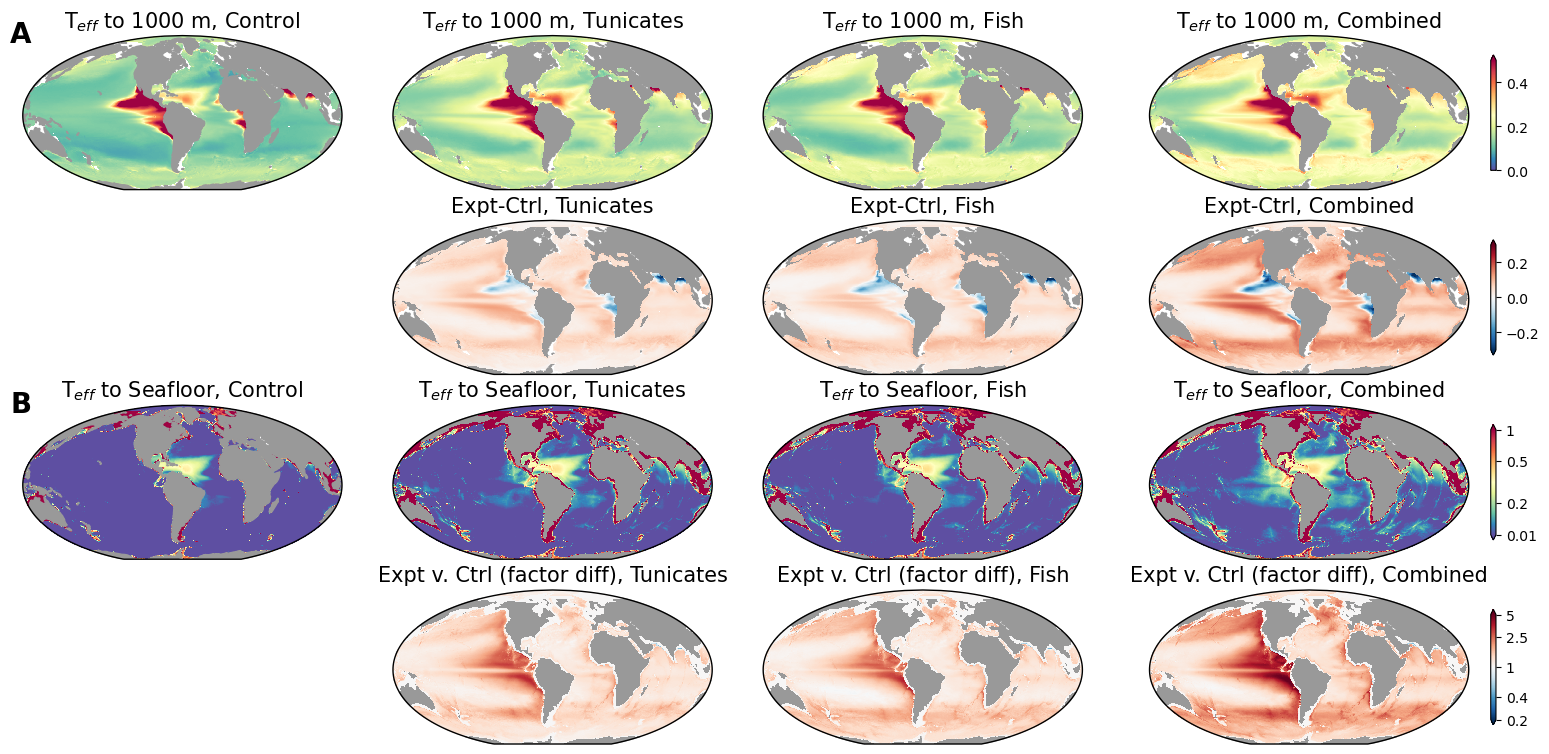

In [32]:
fig=plt.figure(figsize=(20,14))
gs=gridspec.GridSpec(6,4, wspace=0.05, width_ratios=[1,1,1,1.25])

ax={};cs={}

## Teff to Seq depths ##
vmin=0; vmax=0.5
dmin=-0.3; dmax=-dmin

i=0
field=te1000_ctrl
ax[i]=plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('T$_{eff}$ to 1000 m, Control', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')
ax[i].text(-0.04, 1.1, 'A', transform=ax[i].transAxes, fontsize=20, fontweight='bold', va='top')

i=1
field=te1000_tun
ax[i]=plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('T$_{eff}$ to 1000 m, Tunicates', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

i=2
field=te1000_hp
ax[i]=plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('T$_{eff}$ to 1000 m, Fish', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

i=3
field=te1000_tun_hp
ax[i]=plt.subplot(gs[0,3],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('T$_{eff}$ to 1000 m, Combined', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='max')

# diffs
i=4
field=te1000_tun-te1000_ctrl
ax[i] = plt.subplot(gs[1,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Tunicates', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

i=5
field=te1000_hp-te1000_ctrl
ax[i] = plt.subplot(gs[1,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Fish', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

i=6
field=te1000_tun_hp-te1000_ctrl
ax[i] = plt.subplot(gs[1,3],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Combined', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')



## Teff to Seafloor ##
vmin=-1; vmax=0
ticks=[-1, -0.7, -0.3, 0]
labels=[0.01, 0.2, 0.5, 1]


i=7
field=np.log10(tebtm_ctrl)
ax[i]=plt.subplot(gs[2,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('T$_{eff}$ to Seafloor, Control', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')
ax[i].text(-0.04, 1.1, 'B', transform=ax[i].transAxes, fontsize=20, fontweight='bold', va='top')

i=8
field=np.log10(tebtm_tun)
ax[i]=plt.subplot(gs[2,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('T$_{eff}$ to Seafloor, Tunicates', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

i=9
field=np.log10(tebtm_hp)
ax[i]=plt.subplot(gs[2,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('T$_{eff}$ to Seafloor, Fish', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

i=10
field=np.log10(tebtm_tun_hp)
ax[i]=plt.subplot(gs[2,3],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('T$_{eff}$ to Seafloor, Combined', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

cbar=plt.colorbar(cs[i], shrink=0.75, ticks=ticks, extend='both')
cbar.ax.set_yticklabels(labels)

# diffs
dmin=-0.7; dmax=0.7
ticks=[-0.7, -0.4, 0, 0.4, 0.7]
labels=[0.2, 0.4, 1, 2.5, 5]

i=11
field=np.log10(tebtm_tun)-np.log10(tebtm_ctrl)
ax[i] = plt.subplot(gs[3,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt v. Ctrl (factor diff), Tunicates', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

i=12
field=np.log10(tebtm_hp)-np.log10(tebtm_ctrl)
ax[i] = plt.subplot(gs[3,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt v. Ctrl (factor diff), Fish', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

i=13
field=np.log10(tebtm_tun_hp)-np.log10(tebtm_ctrl)
ax[i] = plt.subplot(gs[3,3],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt v. Ctrl (factor diff), Combined', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

cbar=plt.colorbar(cs[i], shrink=0.75, ticks=ticks, extend='both')
cbar.ax.set_yticklabels(labels)


plt.tight_layout()
plt.savefig('plots/Combined_TransferEfficiency_Comparison.png', dpi=300, bbox_inches='tight')
#plt.savefig('plots/Combined_TransferEfficiency_Comparison_hires.png', dpi=600, bbox_inches='tight')


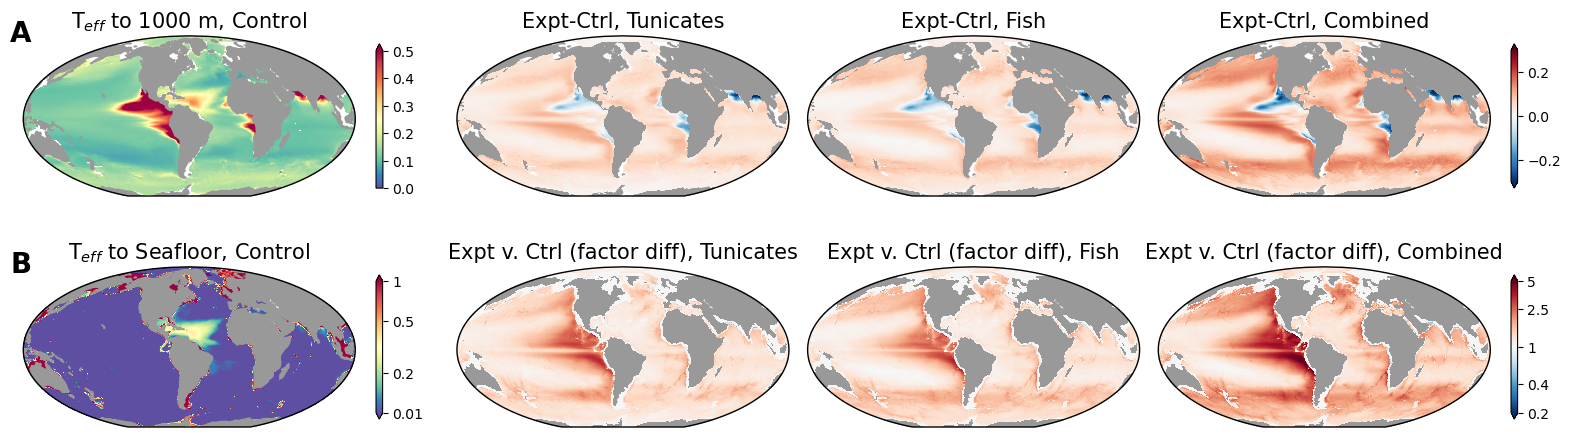

In [33]:
fig=plt.figure(figsize=(20,5.5))
gs=gridspec.GridSpec(2,4, wspace=0.05, width_ratios=[1.25,1,1,1.25])

ax={};cs={}

## Teff to Seq depths ##
vmin=0; vmax=0.5
dmin=-0.3; dmax=-dmin

i=0
field=te1000_ctrl
ax[i]=plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('T$_{eff}$ to 1000 m, Control', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')
ax[i].text(-0.04, 1.1, 'A', transform=ax[i].transAxes, fontsize=20, fontweight='bold', va='top')


plt.colorbar(cs[i], shrink=0.75, extend='max')

# diffs
i=1
field=te1000_tun-te1000_ctrl
ax[i] = plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Tunicates', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

i=2
field=te1000_hp-te1000_ctrl
ax[i] = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Fish', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

i=3
field=te1000_tun_hp-te1000_ctrl
ax[i] = plt.subplot(gs[0,3],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Combined', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')



## Teff to Seafloor ##
vmin=-1; vmax=0
ticks=[-1, -0.7, -0.3, 0]
labels=[0.01, 0.2, 0.5, 1]


i=4
field=np.log10(tebtm_ctrl)
ax[i]=plt.subplot(gs[1,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('T$_{eff}$ to Seafloor, Control', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')
ax[i].text(-0.04, 1.1, 'B', transform=ax[i].transAxes, fontsize=20, fontweight='bold', va='top')

cbar=plt.colorbar(cs[i], shrink=0.75, ticks=ticks, extend='both')
cbar.ax.set_yticklabels(labels)

# diffs
dmin=-0.7; dmax=0.7
ticks=[-0.7, -0.4, 0, 0.4, 0.7]
labels=[0.2, 0.4, 1, 2.5, 5]

i=5
field=np.log10(tebtm_tun)-np.log10(tebtm_ctrl)
ax[i] = plt.subplot(gs[1,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt v. Ctrl (factor diff), Tunicates', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

i=6
field=np.log10(tebtm_hp)-np.log10(tebtm_ctrl)
ax[i] = plt.subplot(gs[1,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt v. Ctrl (factor diff), Fish', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

i=7
field=np.log10(tebtm_tun_hp)-np.log10(tebtm_ctrl)
ax[i] = plt.subplot(gs[1,3],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=dmin, vmax=dmax, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt v. Ctrl (factor diff), Combined', fontsize=15)
#ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='top')

cbar=plt.colorbar(cs[i], shrink=0.75, ticks=ticks, extend='both')
cbar.ax.set_yticklabels(labels)


plt.tight_layout()
plt.savefig('plots/Combined_TransferEfficiency_Comparison_reduced.png', dpi=300, bbox_inches='tight')
